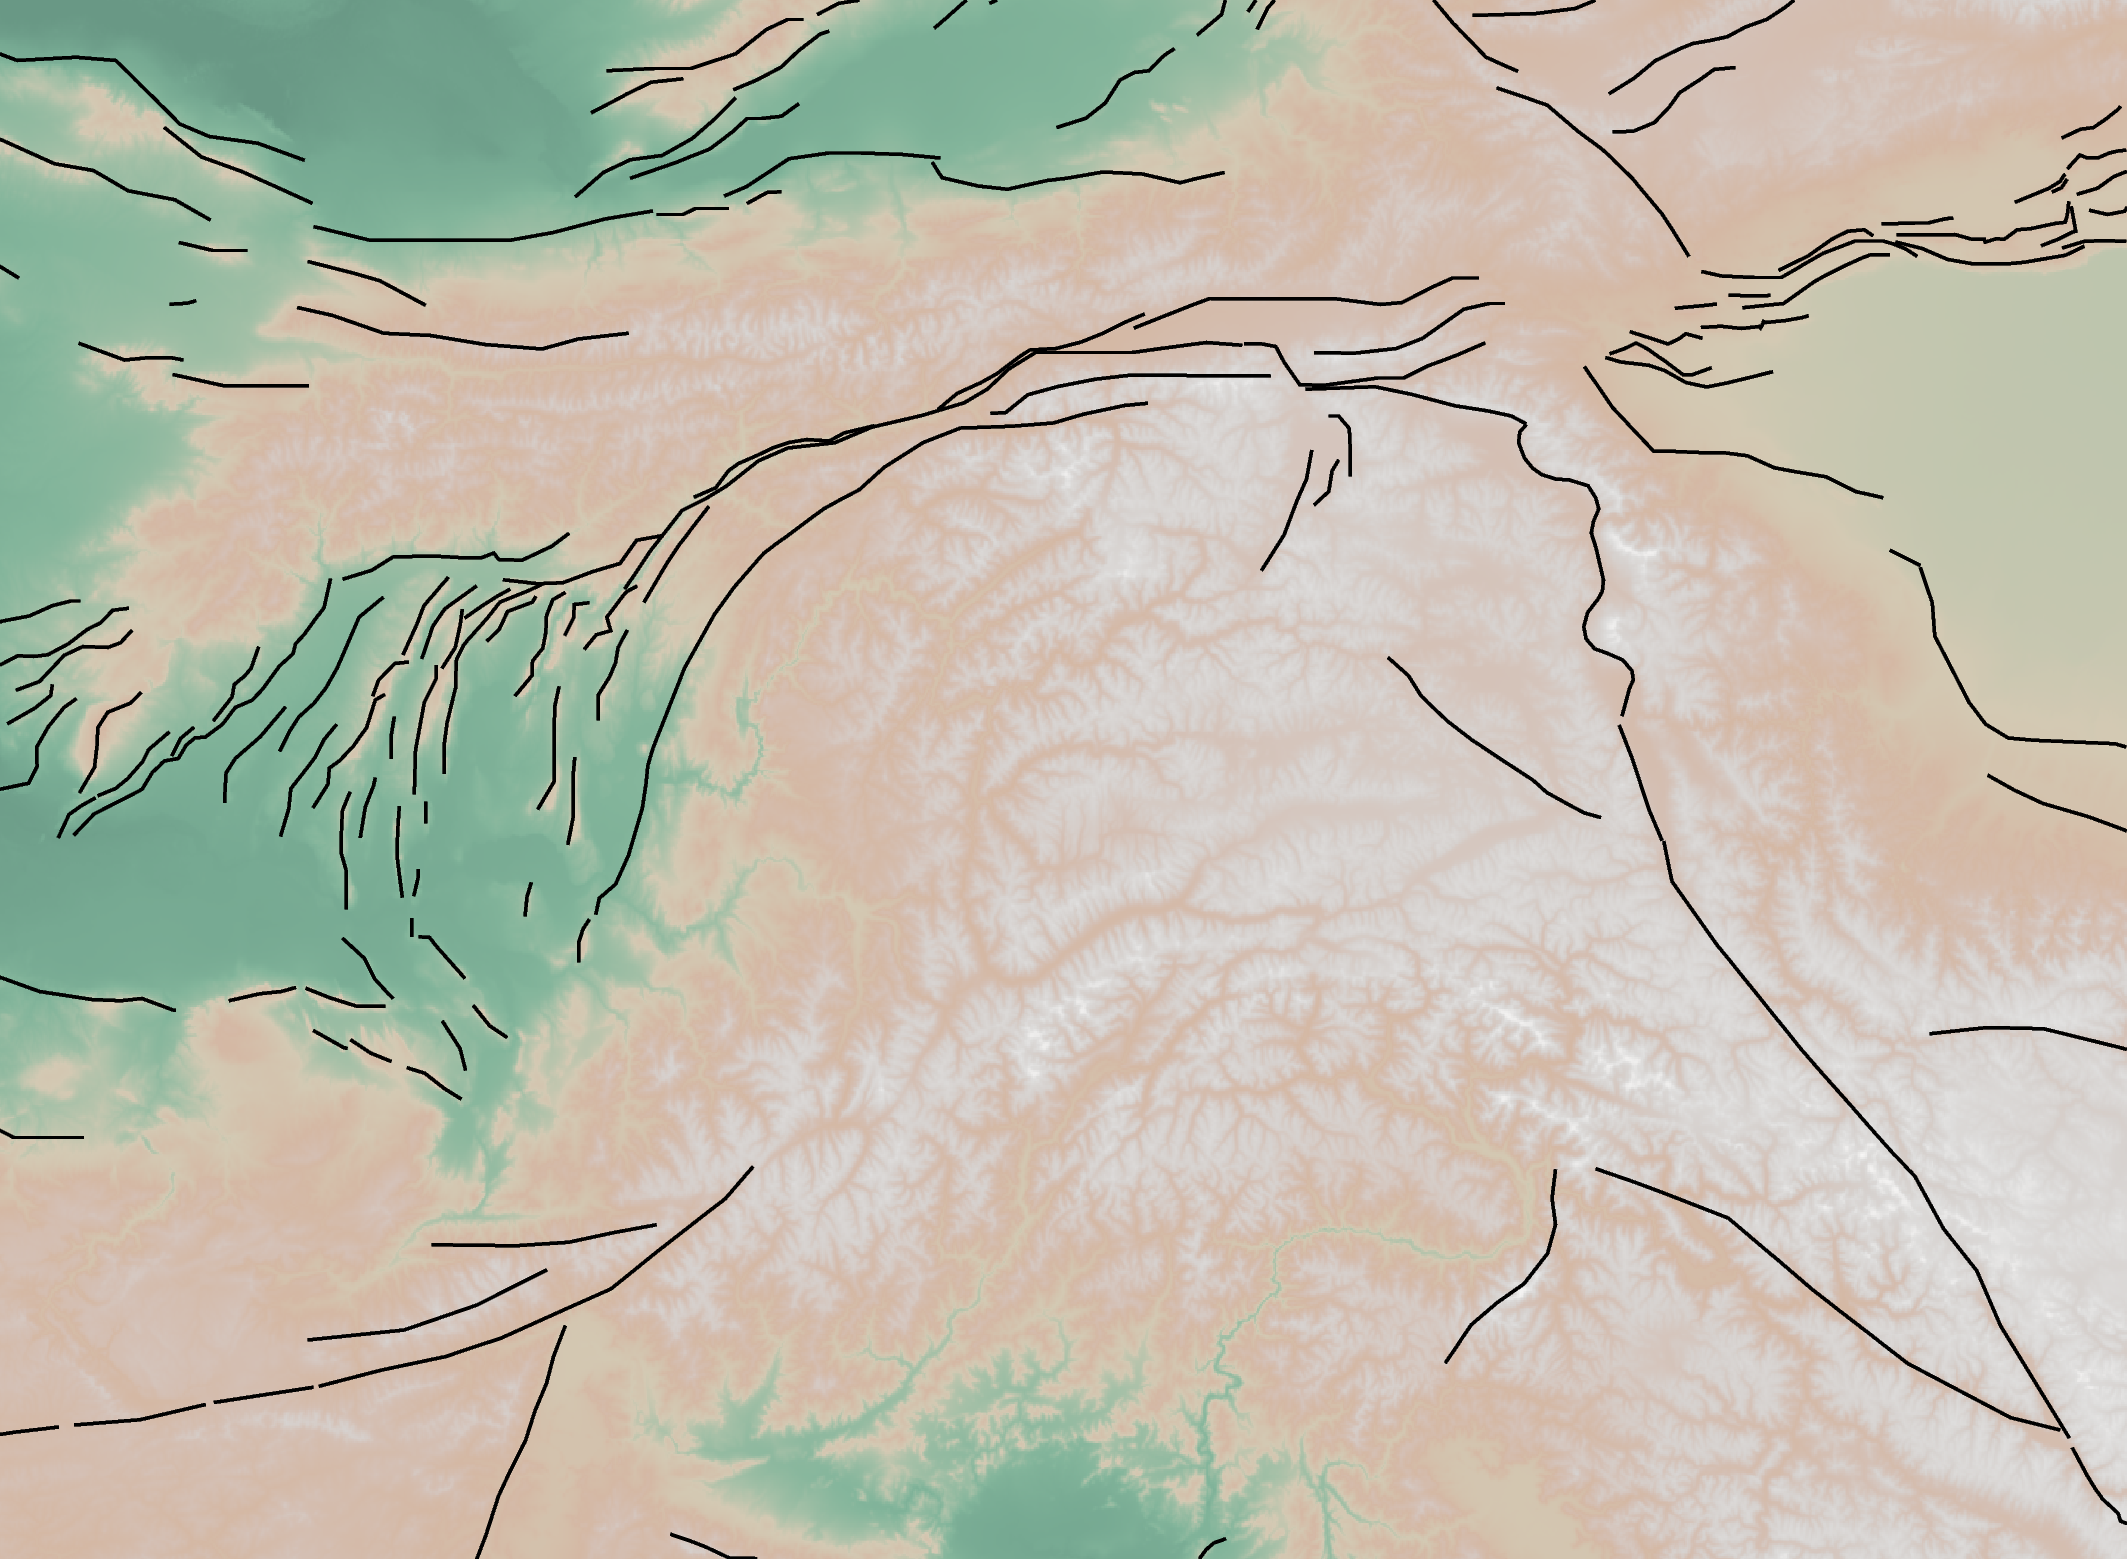

In [1]:
import pygmt

### Making a demo pyGMT basemap ###

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=66 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=78 # upper right corner longitude
urcrnrlat=41 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i
###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)


fig = pygmt.Figure()
# pygmt.config(MAP_FRAME_TYPE="plain") # figure config (borders)
fig.coast(region=region,\
          projection="M%s/%s/%s%s" % (centerlon, centerlat, proj_scale_w, proj_scale_unit),\
          water="white", land="grey", shorelines="1/0.5p")

          # Mercator
          # a2f0.5 --> major ticks every 2 and minor ticks every 0.5

fig.grdimage(grid=grid, cmap="elevation")


## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
fig.plot(data="bin/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults

fig.show()
fig.savefig("test.png")

In [2]:
#import IntPyGMT_overlay
from IntPyGMT.IntPyGMT_overlay import interactive_pygmt

%matplotlib inline
%matplotlib widget

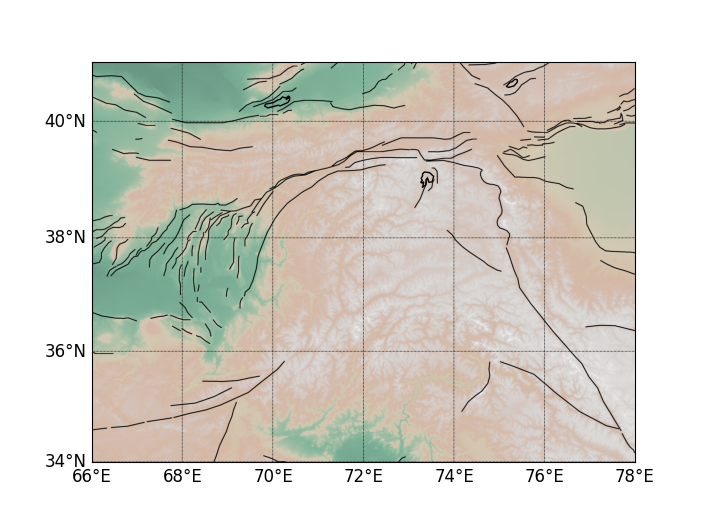

TypeError: input must be a scalar

In [3]:
grid_freq = 2
interactive_pygmt("test.png", llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon, grid_freq)